In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v25
from Resources.Game import *


In [4]:
model = Model_v25()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v25')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v25/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 1500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [5]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.5284881591796875
validation error for model_batch 20: 0.4855102002620697
validation error for model_batch 30: 0.5267323851585388
validation error for model_batch 40: 0.5219933390617371
validation error for model_batch 50: 0.4771937429904938
validation error for model_batch 60: 0.4600067436695099
validation error for model_batch 70: 0.4448825716972351
validation error for model_batch 80: 0.4273691773414612
validation error for model_batch 90: 0.40744706988334656
validation error for model_batch 100: 0.37090060114860535


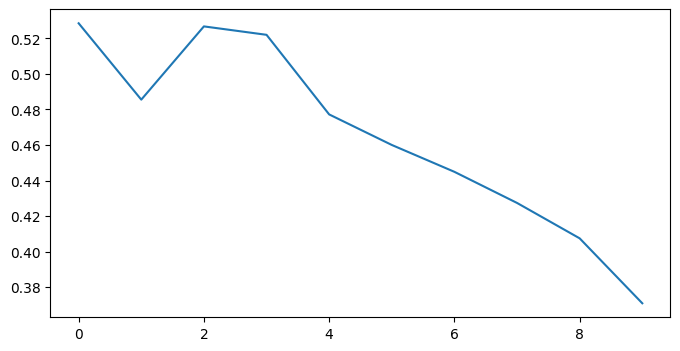

validation error for model_batch 110: 0.41444310545921326
validation error for model_batch 120: 0.3805675506591797
validation error for model_batch 130: 0.3695744574069977
validation error for model_batch 140: 0.35608088970184326
validation error for model_batch 150: 0.3674345910549164
validation error for model_batch 160: 0.37170687317848206
validation error for model_batch 170: 0.39685681462287903
validation error for model_batch 180: 0.3488888144493103
validation error for model_batch 190: 0.3724668323993683
validation error for model_batch 200: 0.3802224099636078


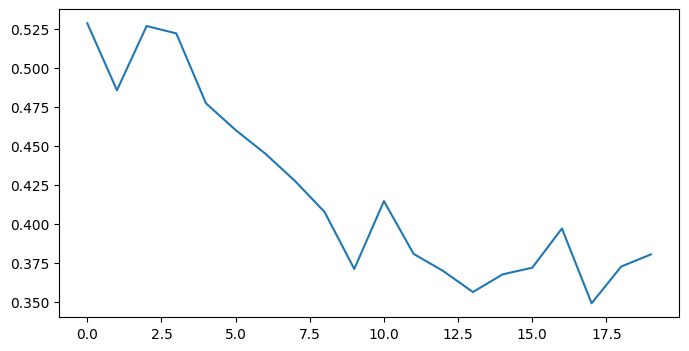

validation error for model_batch 210: 0.35497671365737915
validation error for model_batch 220: 0.3171740770339966
validation error for model_batch 230: 0.3737249970436096
validation error for model_batch 240: 0.3952188789844513
validation error for model_batch 250: 0.3516785502433777
validation error for model_batch 260: 0.35797569155693054
validation error for model_batch 270: 0.3541070222854614
validation error for model_batch 280: 0.3495257794857025
validation error for model_batch 290: 0.3377809226512909
validation error for model_batch 300: 0.3705279529094696


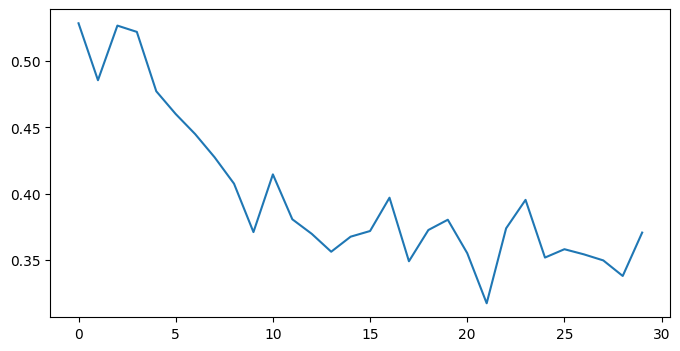

validation error for model_batch 310: 0.3378826081752777
validation error for model_batch 320: 0.3313131034374237
validation error for model_batch 330: 0.333819180727005
validation error for model_batch 340: 0.33516111969947815
validation error for model_batch 350: 0.3693907856941223
validation error for model_batch 360: 0.36790338158607483
validation error for model_batch 370: 0.3429001271724701
validation error for model_batch 380: 0.3383585810661316
validation error for model_batch 390: 0.3332667946815491
validation error for model_batch 400: 0.31534990668296814


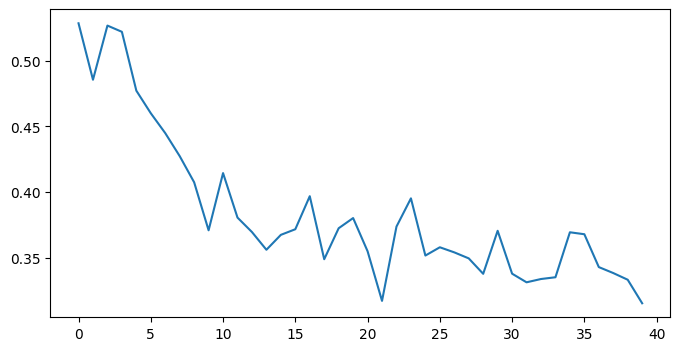

validation error for model_batch 410: 0.3266263008117676
validation error for model_batch 420: 0.32828354835510254
validation error for model_batch 430: 0.36755597591400146
validation error for model_batch 440: 0.3417581021785736
validation error for model_batch 490: 0.33491119742393494
validation error for model_batch 500: 0.37044015526771545
validation error for model_batch 510: 0.3336303234100342
validation error for model_batch 520: 0.3278181552886963
validation error for model_batch 530: 0.3400823473930359
validation error for model_batch 540: 0.34546083211898804


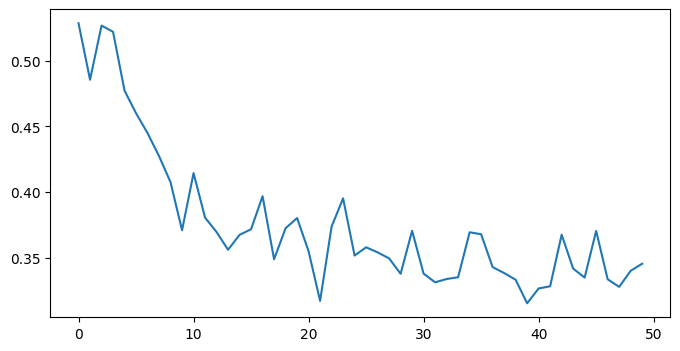

validation error for model_batch 550: 0.33298617601394653
validation error for model_batch 560: 0.3292534053325653
validation error for model_batch 570: 0.3438950777053833
validation error for model_batch 580: 0.338051438331604
validation error for model_batch 590: 0.3401544690132141
validation error for model_batch 600: 0.3465687930583954
validation error for model_batch 610: 0.3353962004184723
validation error for model_batch 620: 0.3517387807369232
validation error for model_batch 630: 0.35114508867263794
validation error for model_batch 640: 0.3452577292919159


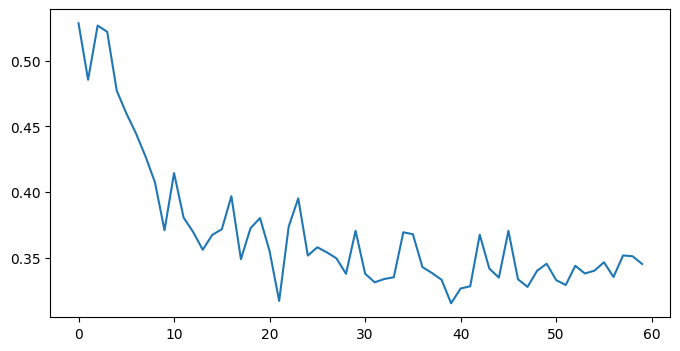

validation error for model_batch 650: 0.3224940299987793
validation error for model_batch 660: 0.325184166431427
validation error for model_batch 670: 0.33513307571411133
validation error for model_batch 680: 0.3638330101966858
validation error for model_batch 690: 0.3478700518608093
validation error for model_batch 700: 0.34308719635009766
validation error for model_batch 710: 0.3358830511569977
validation error for model_batch 720: 0.32999417185783386
validation error for model_batch 730: 0.33301135897636414
validation error for model_batch 740: 0.3277880549430847


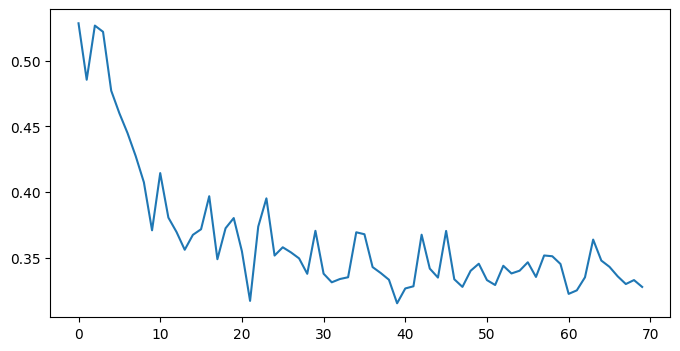

validation error for model_batch 750: 0.31923121213912964
validation error for model_batch 760: 0.3197275400161743
validation error for model_batch 770: 0.31535032391548157
validation error for model_batch 780: 0.3633437752723694
validation error for model_batch 790: 0.34412282705307007
validation error for model_batch 800: 0.3362150490283966
validation error for model_batch 810: 0.3342052400112152
validation error for model_batch 820: 0.32877209782600403
validation error for model_batch 830: 0.3355043828487396
validation error for model_batch 840: 0.32055169343948364


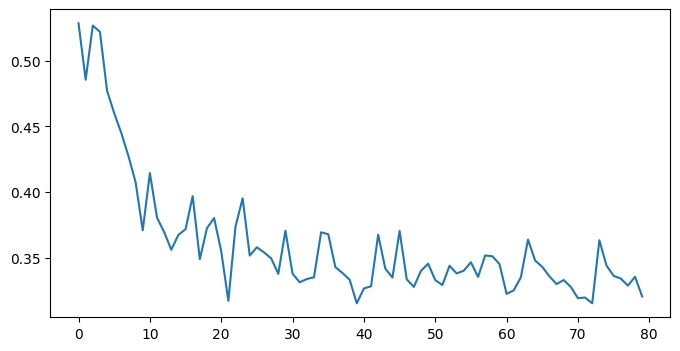

validation error for model_batch 850: 0.31164512038230896
validation error for model_batch 860: 0.327038437128067
validation error for model_batch 870: 0.31700798869132996
validation error for model_batch 880: 0.3433153033256531
validation error for model_batch 890: 0.3199184238910675
validation error for model_batch 900: 0.3097846210002899
validation error for model_batch 910: 0.3368571996688843
validation error for model_batch 920: 0.3371773660182953
validation error for model_batch 930: 0.33419835567474365
validation error for model_batch 940: 0.3335620164871216


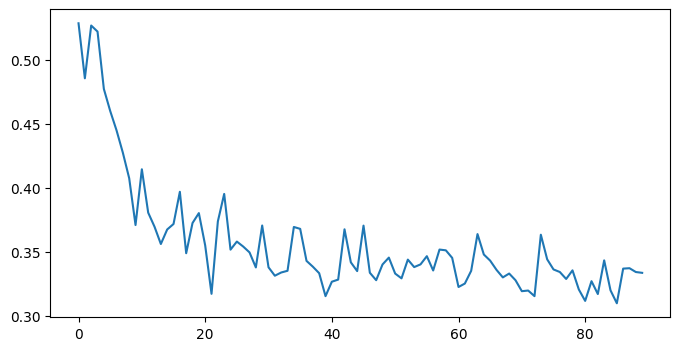

validation error for model_batch 950: 0.3341376781463623
validation error for model_batch 960: 0.3085315525531769
validation error for model_batch 970: 0.3265211284160614
validation error for model_batch 980: 0.31478357315063477
validation error for model_batch 990: 0.3028043806552887
validation error for model_batch 1000: 0.3176514208316803
validation error for model_batch 1010: 0.30864936113357544
validation error for model_batch 1020: 0.3226518929004669
validation error for model_batch 1030: 0.32062047719955444
validation error for model_batch 1040: 0.327034056186676


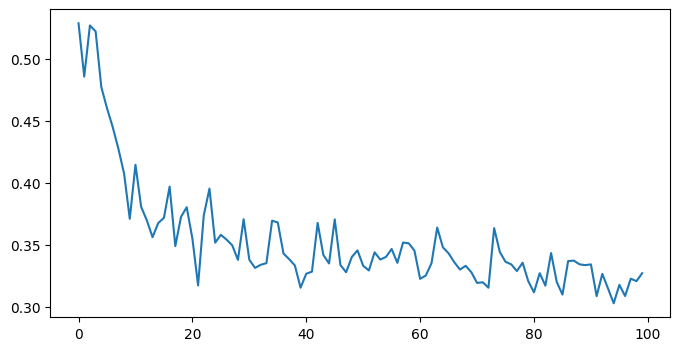

validation error for model_batch 1050: 0.31659260392189026
validation error for model_batch 1060: 0.30673864483833313
validation error for model_batch 1070: 0.30916544795036316
validation error for model_batch 1080: 0.32549920678138733
validation error for model_batch 1090: 0.30314502120018005
validation error for model_batch 1100: 0.34191325306892395
validation error for model_batch 1110: 0.31777921319007874
validation error for model_batch 1120: 0.324889212846756
validation error for model_batch 1130: 0.3295207917690277
validation error for model_batch 1140: 0.3306145966053009


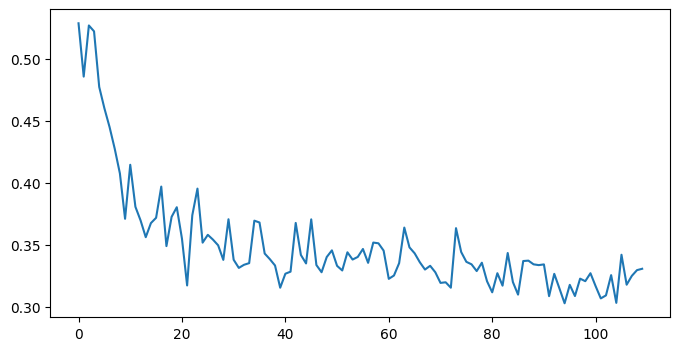

validation error for model_batch 1150: 0.3139989972114563
validation error for model_batch 1160: 0.3358714282512665
validation error for model_batch 1170: 0.32901379466056824
validation error for model_batch 1180: 0.334617018699646
validation error for model_batch 1190: 0.31316593289375305
validation error for model_batch 1200: 0.34402063488960266
validation error for model_batch 1210: 0.3421391248703003
validation error for model_batch 1220: 0.3380293548107147
validation error for model_batch 1230: 0.330752968788147
validation error for model_batch 1240: 0.32138168811798096


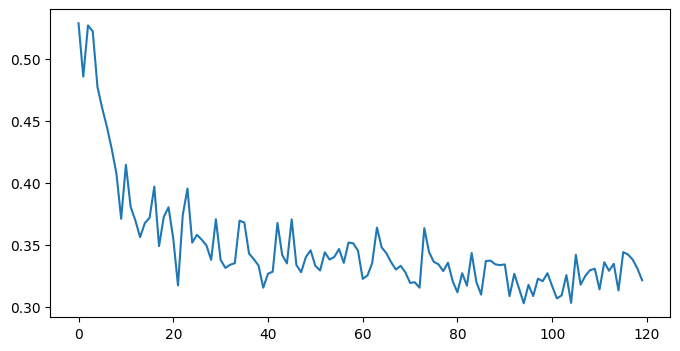

validation error for model_batch 1250: 0.3192889392375946
validation error for model_batch 1260: 0.3354865312576294
validation error for model_batch 1270: 0.3179473876953125
validation error for model_batch 1280: 0.31452038884162903
validation error for model_batch 1290: 0.31995585560798645
validation error for model_batch 1300: 0.32416415214538574
validation error for model_batch 1310: 0.30377379059791565
validation error for model_batch 1320: 0.3108724057674408
validation error for model_batch 1330: 0.33181896805763245
validation error for model_batch 1340: 0.32653847336769104


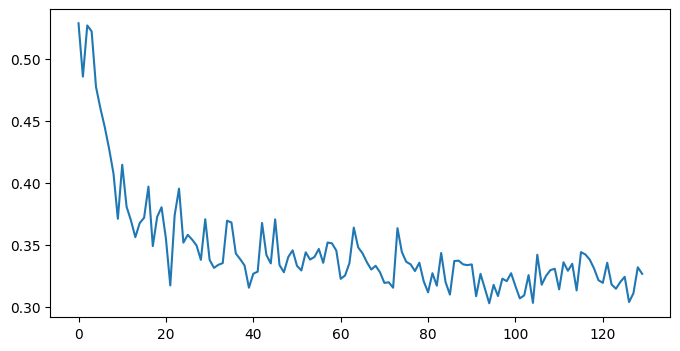

validation error for model_batch 1350: 0.3238689601421356
validation error for model_batch 1360: 0.32553187012672424
validation error for model_batch 1370: 0.3215811550617218
validation error for model_batch 1380: 0.32169824838638306
validation error for model_batch 1390: 0.3332333266735077
validation error for model_batch 1400: 0.3175644278526306
validation error for model_batch 1410: 0.31450921297073364
validation error for model_batch 1420: 0.3177419900894165
validation error for model_batch 1430: 0.3174641728401184
validation error for model_batch 1440: 0.320161908864975


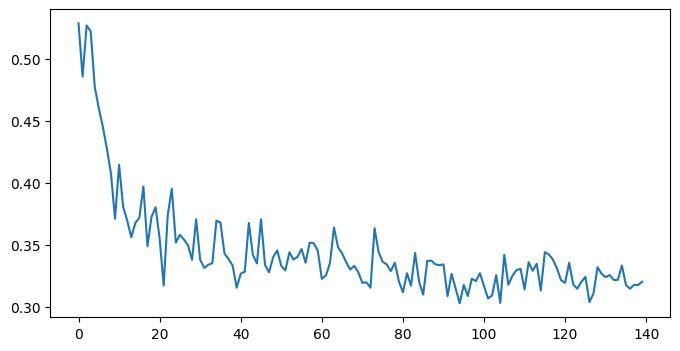

validation error for model_batch 1450: 0.3244134485721588
validation error for model_batch 1460: 0.3246406316757202
validation error for model_batch 1470: 0.33345356583595276
validation error for model_batch 1480: 0.33180341124534607
validation error for model_batch 1490: 0.31929606199264526
validation error for model_batch 1500: 0.3094578683376312
validation error for model_batch 1510: 0.31609058380126953
validation error for model_batch 1520: 0.32444673776626587
validation error for model_batch 1530: 0.3231181204319
validation error for model_batch 1540: 0.3299750089645386


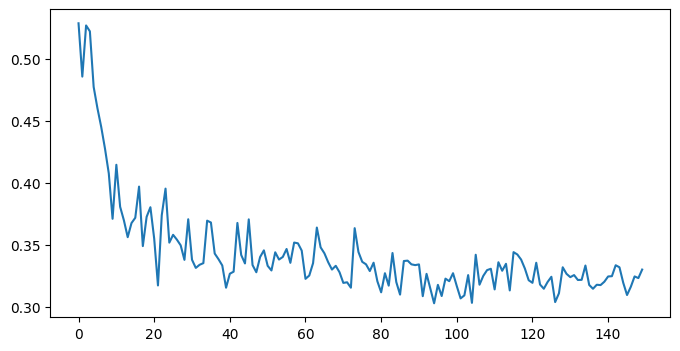

validation error for model_batch 1550: 0.326040655374527
validation error for model_batch 1560: 0.3471519947052002
validation error for model_batch 1570: 0.3384973108768463
validation error for model_batch 1580: 0.3410373628139496
validation error for model_batch 1590: 0.31907427310943604
validation error for model_batch 1600: 0.30994749069213867
validation error for model_batch 1610: 0.31319931149482727
validation error for model_batch 1620: 0.33178481459617615
validation error for model_batch 1630: 0.3203853964805603
validation error for model_batch 1640: 0.3177248239517212


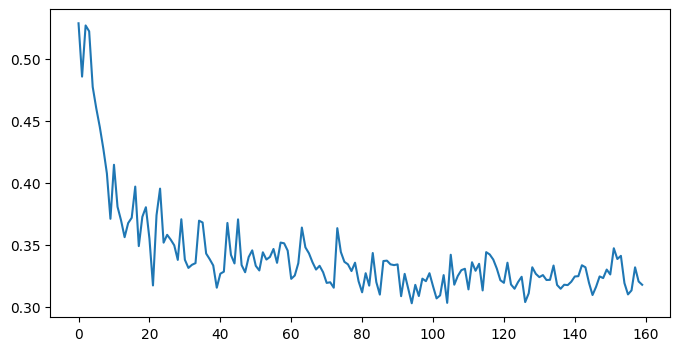

validation error for model_batch 1650: 0.29935935139656067
validation error for model_batch 1660: 0.3300360441207886
validation error for model_batch 1670: 0.3674469292163849
validation error for model_batch 1680: 0.32163411378860474
validation error for model_batch 1690: 0.3224649727344513
validation error for model_batch 1700: 0.32951247692108154
validation error for model_batch 1710: 0.32691168785095215
validation error for model_batch 1720: 0.31632620096206665
validation error for model_batch 1730: 0.32809820771217346
validation error for model_batch 1740: 0.3278639614582062


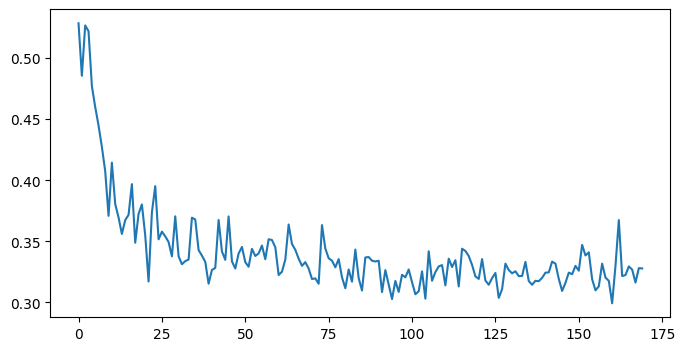

validation error for model_batch 1750: 0.33647072315216064
validation error for model_batch 1760: 0.32157671451568604
validation error for model_batch 1770: 0.313927561044693
validation error for model_batch 1790: 0.3277166187763214
validation error for model_batch 1800: 0.3276126980781555
validation error for model_batch 1810: 0.32291197776794434
validation error for model_batch 1820: 0.33234935998916626
validation error for model_batch 1830: 0.3386264741420746
validation error for model_batch 1840: 0.321889728307724
validation error for model_batch 1850: 0.3097344934940338


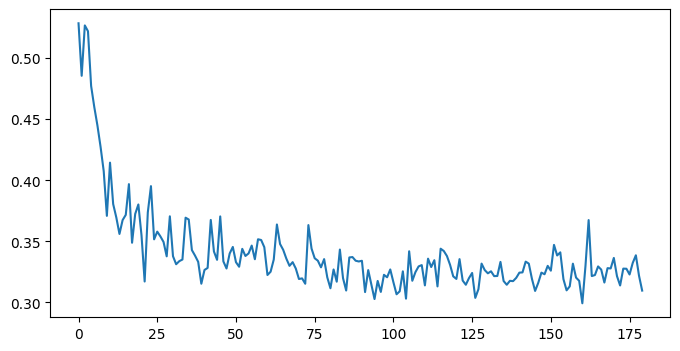

validation error for model_batch 1860: 0.3296663165092468
validation error for model_batch 1870: 0.3240050673484802
validation error for model_batch 1880: 0.3338354527950287
validation error for model_batch 1890: 0.33391550183296204
validation error for model_batch 1900: 0.312156617641449
validation error for model_batch 1910: 0.33324548602104187
validation error for model_batch 1920: 0.32381758093833923
validation error for model_batch 1930: 0.3511177599430084
validation error for model_batch 1940: 0.2969191074371338
validation error for model_batch 1950: 0.3487189710140228


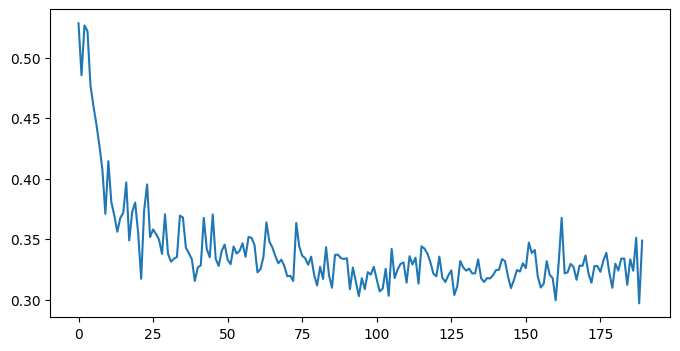

validation error for model_batch 1960: 0.29539814591407776
validation error for model_batch 1970: 0.32729965448379517
validation error for model_batch 1980: 0.32602763175964355
validation error for model_batch 1990: 0.31858739256858826
validation error for model_batch 2000: 0.32005760073661804


KeyboardInterrupt: 

In [6]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v25')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v25()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v25/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    torch.save(validation_error_list, 'validation_errors_v25')

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()